In [13]:
import os
import torch
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from process import get_data_DLPFC, process_data
from train import train
warnings.filterwarnings("ignore")

In [14]:
dataset = ["151507", "151508", "151509", "151510", "151669", "151670", "151671", "151672", "151673", "151674", "151675", "151676"]
alpha_lists = [[0.8], [0.5], [0.6], [0.5]] + [[0.4], [0.4], [0.8], [0.8]] + [[0.5], [0.8], [0.8], [0.8]]
beta_lists = [[1.0]] * 12
mid_k_neighbor_lists = [[7]] * 4 + [[7]] * 4 + [[7]] * 4
num_classes_list = [7, 7, 7, 7, 5, 5, 5, 5, 7, 7, 7, 7]
start_k_neighbor_num = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
rad_distance_num = [150 for _ in range(len(dataset))]

In [15]:
adata_list_post = []
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
data_name = 'DLPFC'
method = 'GraphSTAR'
hidden_dim = 50   # 聚类的维度
lr = 0.001
epochs = 1000
mode ='KNN'
save_adata_root = '../res/{}/{}/data'.format(method, data_name)
is_test_last = True
metric_list = {"ARI": [], "AMI": [], "NMI": []}
print("当前训练的数据集: {}".format(data_name))
for index, section_id in enumerate(dataset):
    torch.cuda.empty_cache()
    print("切片:", section_id, " 聚类数量:", num_classes_list[index])
    adata = get_data_DLPFC(section_id)
    adata = process_data(adata, data_name)
    adata.obs['Ground Truth'] = adata.obs['region']
    print("adata = ", adata)
    adata = train(adata, 
                  data_name=data_name, 
                  num_class=num_classes_list[index], 
                  mode=mode,
                  start_k_neighbor=start_k_neighbor_num[index], 
                  rad_distance=rad_distance_num[index], 
                  hidden_dim=hidden_dim,
                  mid_k_neighbor_list=mid_k_neighbor_lists[index],
                  alpha_list=alpha_lists[index],
                  beta_list=beta_lists[index],
                  lr=lr,
                  epochs=epochs,
                  file_name=section_id,
                  device=device)
    adata_list_post.append(adata)
    metric = adata.uns['metric']
    metric_list['ARI'].append(metric['ARI'])
    metric_list["AMI"].append(metric['AMI'])
    metric_list["NMI"].append(metric['NMI'])
    print('slice = %s best metric:, ARI = %.2f, AMI = %.2f, NMI = %.2f' % (section_id, metric["ARI"], metric["AMI"], metric["NMI"]))



当前训练的数据集: DLPFC
切片: 151507  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 4221 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1095)
空间位置的平均邻居数: tensor(7.1095)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:35<00:00, 10.50it/s]


fitting ...
  |======================================================================| 100%
slice = 151507 best metric:, ARI = 0.58, AMI = 0.71, NMI = 0.71
切片: 151508  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 4381 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1164)
空间位置的平均邻居数: tensor(7.1164)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:41<00:00,  9.89it/s]


fitting ...
  |======================================================================| 100%
slice = 151508 best metric:, ARI = 0.52, AMI = 0.66, NMI = 0.66
切片: 151509  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 4788 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1023)
空间位置的平均邻居数: tensor(7.1023)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:44<00:00,  9.57it/s]


fitting ...
  |======================================================================| 100%
slice = 151509 best metric:, ARI = 0.45, AMI = 0.64, NMI = 0.64
切片: 151510  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 4595 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1036)
空间位置的平均邻居数: tensor(7.1036)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:40<00:00,  9.98it/s]


fitting ...
  |======================================================================| 100%
slice = 151510 best metric:, ARI = 0.46, AMI = 0.61, NMI = 0.61
切片: 151669  聚类数量: 5
adata =  AnnData object with n_obs × n_vars = 3636 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1397)
空间位置的平均邻居数: tensor(7.1397)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:26<00:00, 11.57it/s]


fitting ...
  |======================================================================| 100%
slice = 151669 best metric:, ARI = 0.47, AMI = 0.58, NMI = 0.58
切片: 151670  聚类数量: 5
adata =  AnnData object with n_obs × n_vars = 3484 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1206)
空间位置的平均邻居数: tensor(7.1206)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:19<00:00, 12.51it/s]


fitting ...
  |======================================================================| 100%
slice = 151670 best metric:, ARI = 0.46, AMI = 0.54, NMI = 0.54
切片: 151671  聚类数量: 5
adata =  AnnData object with n_obs × n_vars = 4093 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1114)
空间位置的平均邻居数: tensor(7.1114)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:29<00:00, 11.15it/s]


fitting ...
  |======================================================================| 100%
slice = 151671 best metric:, ARI = 0.63, AMI = 0.72, NMI = 0.72
切片: 151672  聚类数量: 5
adata =  AnnData object with n_obs × n_vars = 3888 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1152)
空间位置的平均邻居数: tensor(7.1152)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:30<00:00, 11.04it/s]


fitting ...
  |======================================================================| 100%
slice = 151672 best metric:, ARI = 0.56, AMI = 0.66, NMI = 0.66
切片: 151673  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 3611 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1390)
空间位置的平均邻居数: tensor(7.1390)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:25<00:00, 11.68it/s]


fitting ...
  |======================================================================| 100%
slice = 151673 best metric:, ARI = 0.60, AMI = 0.71, NMI = 0.71
切片: 151674  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 3635 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1414)
空间位置的平均邻居数: tensor(7.1414)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:26<00:00, 11.58it/s]


fitting ...
  |======================================================================| 100%
slice = 151674 best metric:, ARI = 0.65, AMI = 0.74, NMI = 0.74
切片: 151675  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 3566 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1436)
空间位置的平均邻居数: tensor(7.1436)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:20<00:00, 12.43it/s]


fitting ...
  |======================================================================| 100%
slice = 151675 best metric:, ARI = 0.58, AMI = 0.69, NMI = 0.69
切片: 151676  聚类数量: 7
adata =  AnnData object with n_obs × n_vars = 3431 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'region', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p'
    obsm: 'spatial'
空间位置的平均邻居数: tensor(7.1323)
空间位置的平均邻居数: tensor(7.1323)
in_features = 3000, mid_feature1 = NULL, cluster_features = 50
begin training


100%|██████████| 1000/1000 [01:21<00:00, 12.29it/s]


fitting ...
  |======================================================================| 100%
slice = 151676 best metric:, ARI = 0.61, AMI = 0.71, NMI = 0.71


In [16]:
for index, section_id in enumerate(dataset):
    # 保存到文件
    # 如果save_adata_root路径不存在
    if not os.path.exists(save_adata_root):
        os.makedirs(save_adata_root)
    adata = adata_list_post[index]
    full_path_save_data = os.path.join(save_adata_root, 'slice_{} adata.h5ad'.format(section_id))
    adata.write_h5ad(full_path_save_data)

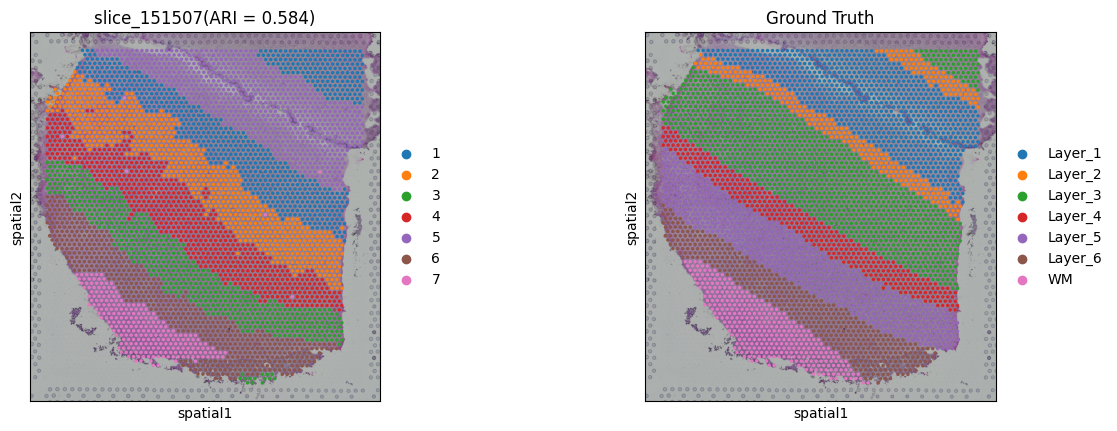

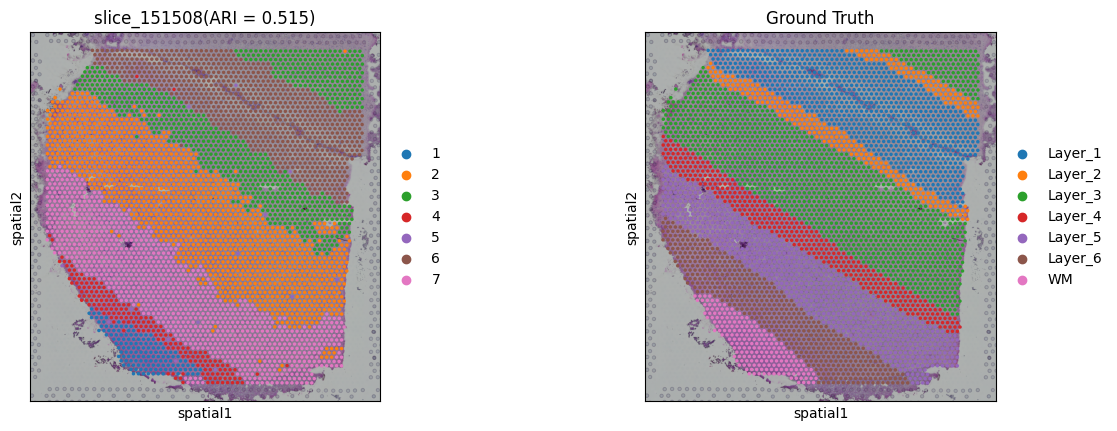

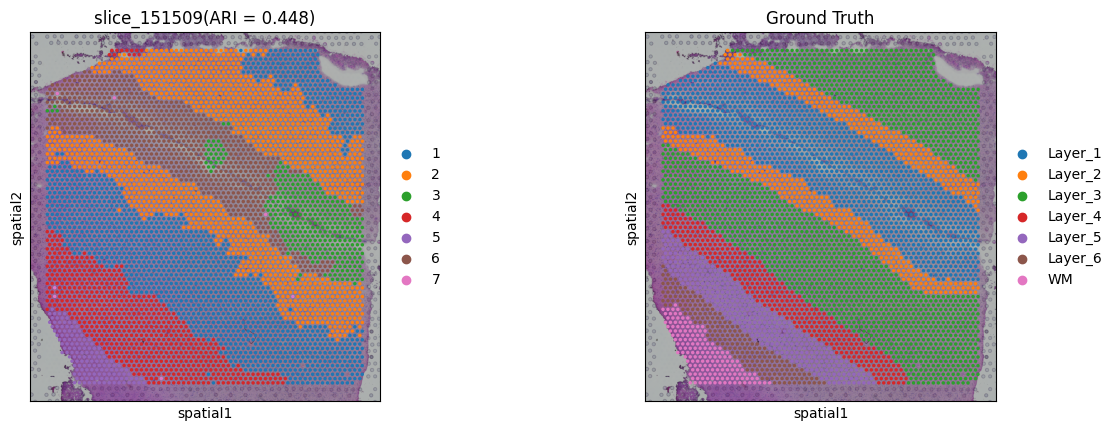

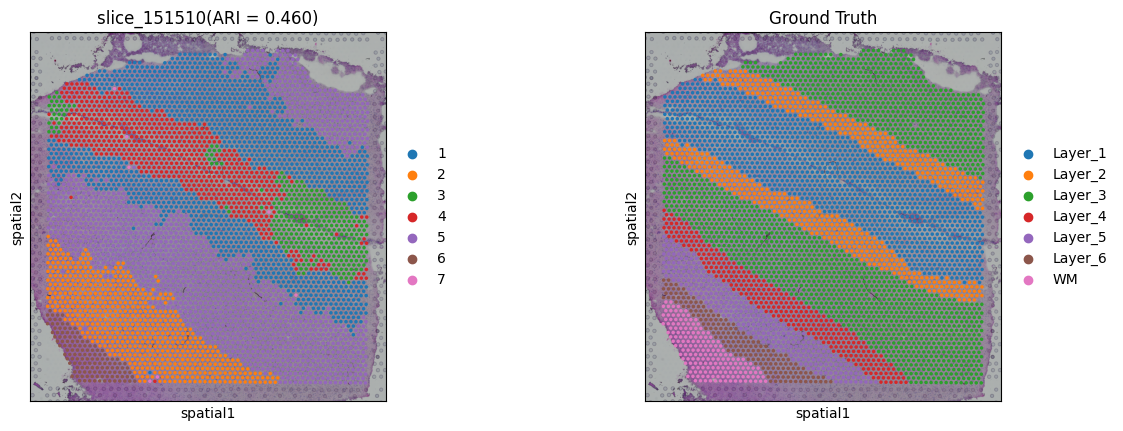

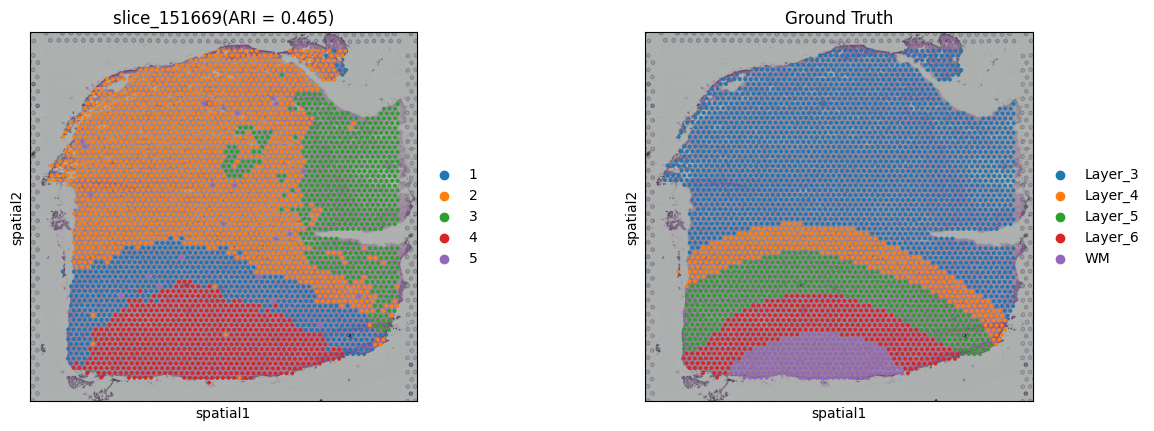

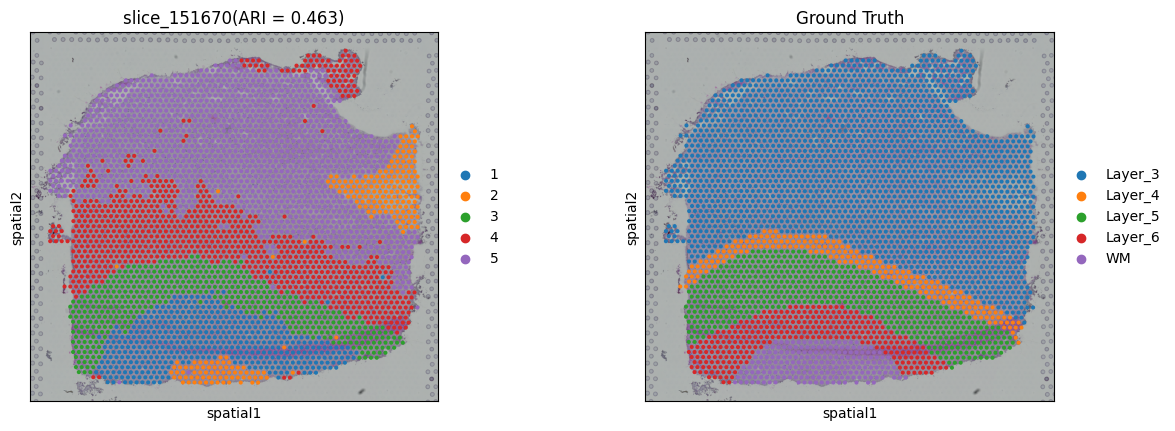

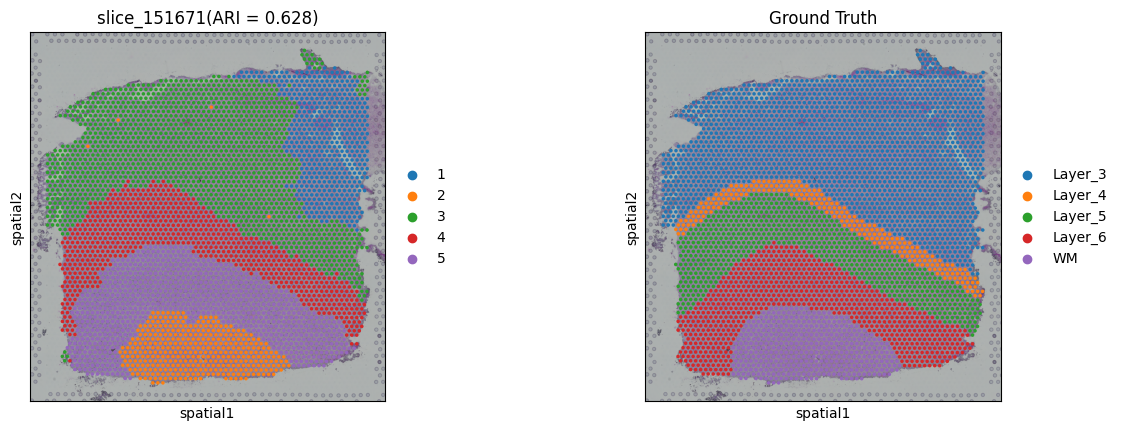

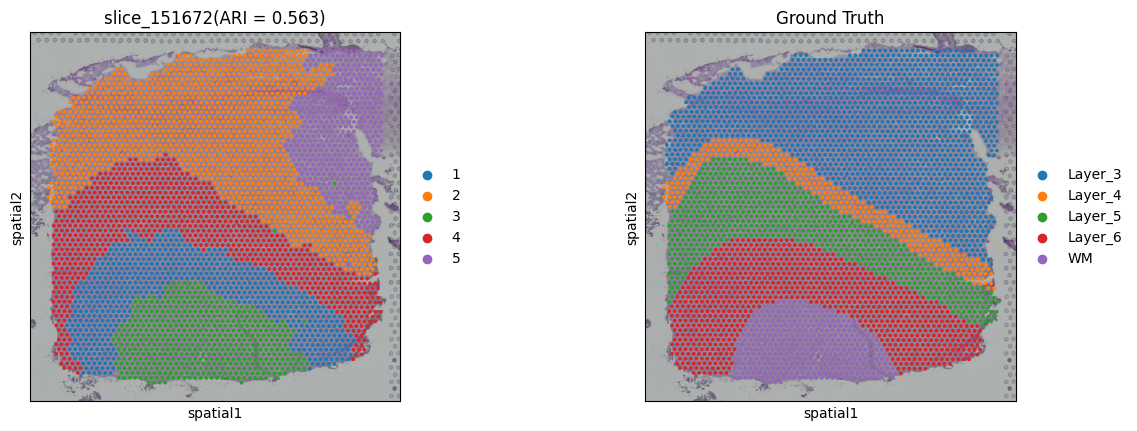

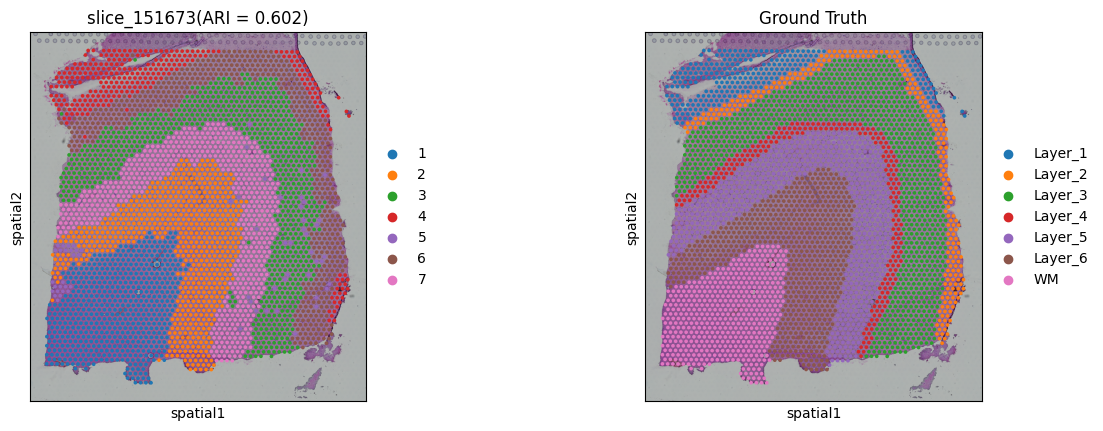

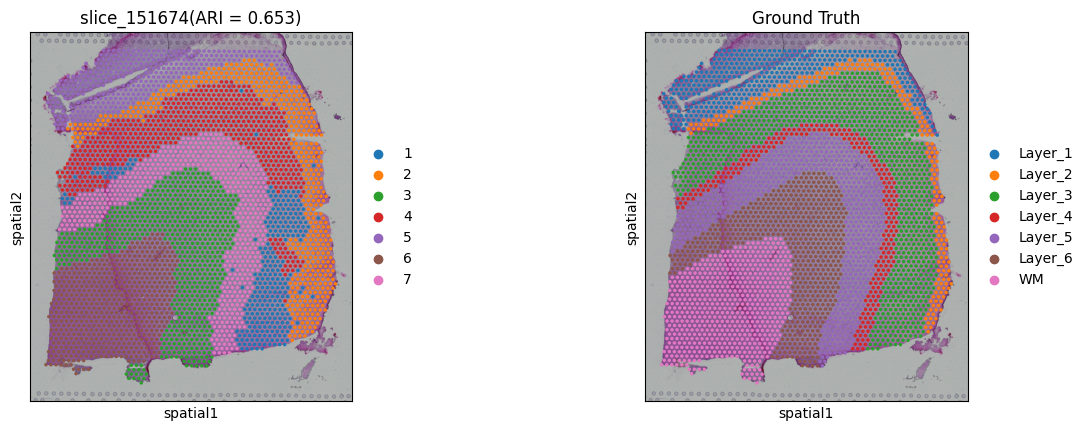

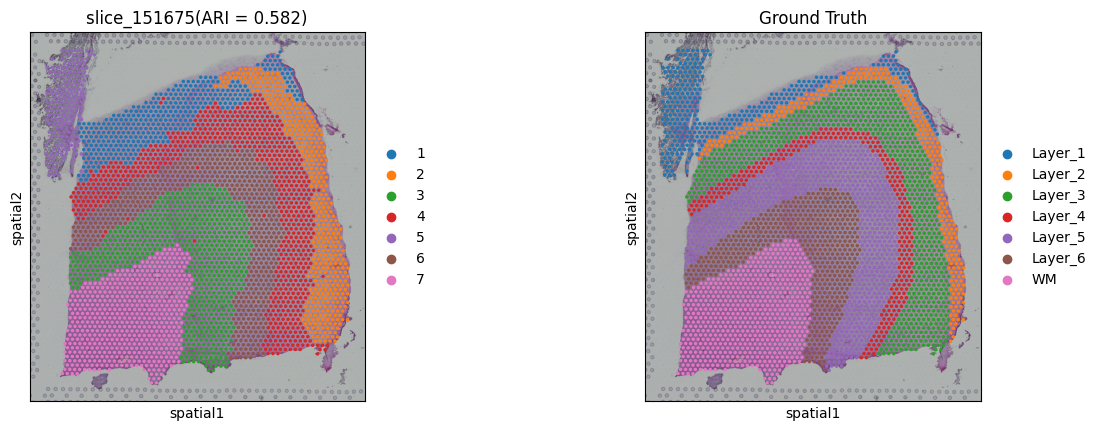

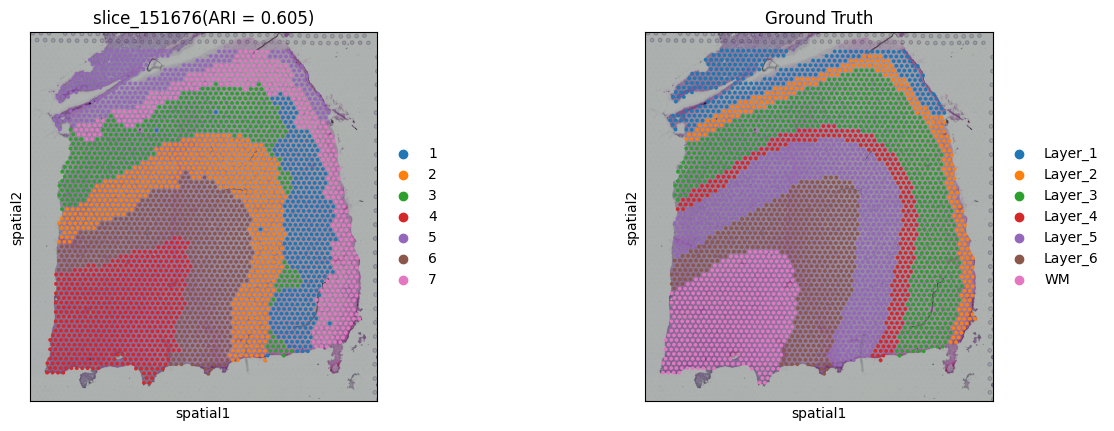

In [17]:
import scanpy as sc
for index, section_id in enumerate(dataset):
    adata = adata_list_post[index]
    sc.pl.spatial(adata, color=['predict', 'Ground Truth'], title=['slice_{}(ARI = {:.3f})'.format(section_id, adata.uns['metric']['ARI']), 'Ground Truth'])

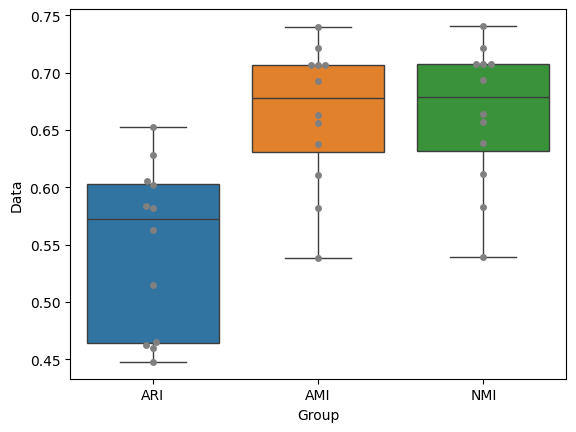

ARI mean = 0.547, ARI median = 0.572
AMI mean = 0.664, AMI median = 0.678
NMI mean = 0.664, NMI median = 0.679


In [18]:
# 绘制箱型图
df = pd.DataFrame({
    'Data': metric_list['ARI'] + metric_list['AMI'] + metric_list['NMI'],
    'Group': ['Data1'] * len(metric_list['ARI']) + ['Data2'] * len(metric_list['AMI']) + ['Data3'] * len(metric_list['NMI'])
})
sns.boxplot(x='Group', y='Data', data=df, hue='Group', legend=False)
sns.swarmplot(x='Group', y='Data', data=df, color='grey')
plt.xticks(ticks=[0, 1, 2], labels=['ARI', 'AMI', 'NMI'])

root = '../res/{}/{}/loss/'.format(method, data_name)
if not os.path.exists(root):
    os.makedirs(root)
if len(dataset) == 4:
    plt.savefig(os.path.join(root, '{}箱型图.png'.format(dataset[0] + "到" + dataset[3])))
else:
    plt.savefig(os.path.join(root, '12张的箱型图.png'))
plt.show()

print("ARI mean = {:.3f}, ARI median = {:.3f}".format(np.mean(metric_list["ARI"]), np.median(metric_list["ARI"])))
print("AMI mean = {:.3f}, AMI median = {:.3f}".format(np.mean(metric_list["AMI"]), np.median(metric_list["AMI"])))
print("NMI mean = {:.3f}, NMI median = {:.3f}".format(np.mean(metric_list["NMI"]), np.median(metric_list["NMI"])))
